# Implementing all models 


In [374]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [375]:
df = pd.read_csv("NAS.csv")                         #Read the csv
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index


In [471]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN



In [470]:
df['days_from_start'] = (df.index - df.index[0]).days
X = df['days_from_start'].values.reshape(-1, 1)
y = df['Close'].values



In [378]:
from sklearn.model_selection import train_test_split #Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [379]:

from sklearn import preprocessing
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)



In [419]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)  #Fits it with a linar regression

from sklearn.linear_model import SGDRegressor
# SkLearn SGD classifier
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

from sklearn.tree import DecisionTreeRegressor
DTreeModel = DecisionTreeRegressor(max_depth=10000)
DTreeModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10000)

In [420]:

print("LinearRegression intercept" +str(regressor.intercept_))
print("LinearRegression coef" +str(regressor.coef_))

print("SGDRegression intercept" +str(sgd.intercept_))
print("SGDRegression coef" +str(sgd.coef_))


LinearRegression intercept80.28803066101693
LinearRegression coef[27.7529151]
SGDRegression intercept[80.61248343]
SGDRegression coef[28.17180663]


In [407]:
LR_pred = regressor.predict(X_test)
SGD_pred = sgd.predict(X_test)
Dtree_pred = DTreeModel.predict(X_test)


In [408]:
from sklearn import metrics
def ModelScoring(name, model): #pass the name of the model, and the model itself
    print(name)
    print('Mean Squared Error :',metrics.mean_squared_error(y_test, model.predict(X_test)))
    print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, model.predict(X_test)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    print("Score:", model.score(X_test, y_test))
    print()

In [409]:
ModelScoring("SGD Regressor", sgd)
ModelScoring("Linear Regressor", regressor)
ModelScoring("Decision Tree Regressor", DTreeModel)

SGD Regressor
Mean Squared Error : 2327.410013637374
Mean Absolute Error : 36.408214991719454
Root Mean Squared Error: 48.24323800945967
Score: 0.20287089714118178

Linear Regressor
Mean Squared Error : 2325.7962434978367
Mean Absolute Error : 36.420276591070795
Root Mean Squared Error: 48.22650975861551
Score: 0.20342360729367415

Decision Tree Regressor
Mean Squared Error : 10.493652677901277
Mean Absolute Error : 1.7428265648038046
Root Mean Squared Error: 3.239390788080573
Score: 0.9964059637554903



In [410]:
df2 = pd.DataFrame({'Actual': y_test, 'SGD': Dtree_pred})
df2 = df2.sort_index()

<AxesSubplot:>

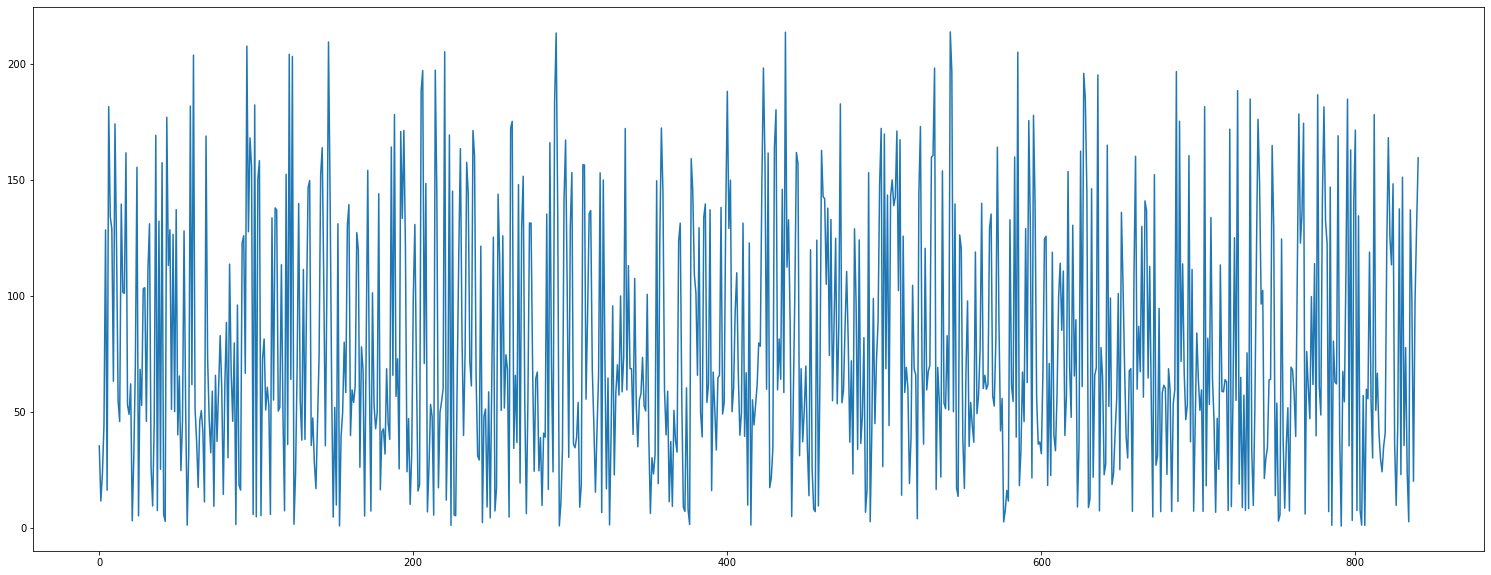

In [411]:
df2['Actual'].plot(figsize=(26,10))
#df2['SGD'].plot(figsize=(26,10))


In [428]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=2, ncols=2)

# diffAct_SGD.plot(figsize=(26,10), color = "Red", ax=axes[0,0])
# diffAct_LR.plot(figsize=(26,10), ax=axes[0,1])
# diffMeanAct.plot(figsize=(26,10), ax=axes[1,0])
# df2['Actual'].plot(figsize=(26,10), ax=axes[1,1])

## Predict todays closing price by giving todays opening price

In [464]:
#predicts the price according to the selected algorithm
def predictPrice(date, algorithm):
    date=normalizeData(date)
    prediction = algorithm.predict(date)
    return prediction

In [465]:
from pandas import DataFrame
#from statistics import mean
def normalizeData(date):
    outDate=pd.DataFrame([[date]])
    outDate=scaler.transform(outDate)
    #print(outDate)
    return outDate

    
def assessDifference(date, *argv, closing): #The args are the prediction algorithms you want to test on
    
    i=0
    predList = []
    for model in argv:
        prediction = predictPrice(date, model)
        print("Model " +str(model) + ": "+ str(prediction), end=" ")
        predList.append(prediction)
        print(f'The prediction is off by {float(closing-prediction)} NOK')
        i+=1
    
    print(f'The mean of the models is {float(findMean(predList))} NOK')

    print(f'The mean of the models are off by {findMeanDifference(closing, predList)} NOK')
    print(f'The mean of the models are off by {float((closing-prediction)*100/closing)}%')

def findMean(predictionList):
    return sum(predictionList)/len(predictionList)
    
def findMeanDifference(closing, predictionList):
    return float(closing-findMean(predictionList))

        

In [452]:
#converts any inserted date into a number relative to the index of the first data point 
def convertDate(date):
    date = pd.Timestamp(date)
    #print(date)
    return (date - df.index[0]).days

#print(convertDate('2020-10-24'))

#fetches today's date
def fetchToday():
    return pd.Timestamp.today().floor('D')

#print(convertDate(fetchToday()))

In [453]:
assessDifference(convertDate('2020-02-20'), DTreeModel, closing=36.9200)

[[1.60098238]]
Model DecisionTreeRegressor(max_depth=10000): [36.049999] The prediction is off by 0.870001000000002 NOK
The mean of the models is 36.049999 NOK
The mean of the models are off by 0.870001000000002 NOK
The mean of the models are off by 2.3564490790899297%


In [469]:
date = '2020-02-20'
predict = predictPrice(convertDate(date), DTreeModel)
print(f'The predicted price on {date} is {float(predict)} NOK')

The predicted price on 2020-02-20 is 36.049999 NOK


In [427]:
date = df.iloc[days_from_start=convertDate('2020-02-20')] #TODO grab closing price from DF if date is in DF

SyntaxError: invalid syntax (<ipython-input-427-4c4057ce136f>, line 1)